In [13]:
from icnn import ICNNBN2
import numpy as np
from IPython.display import display, clear_output
from utils import variable
import numpy.random as npr
from matplotlib import pyplot as plt

In [42]:
q = ICNNBN2(3, 20, 1, 2)
print('#params: %s' % np.sum([np.prod(p.data.numpy().shape) for p in q.parameters()]))

#params: 2411


In [43]:
import torch as t
optimizer  = t.optim.Adam(q.parameters(), lr=1e-3)

In [44]:
def get_batch(batch_size):
    s = npr.uniform(-1,1,(batch_size, 1))
    a = npr.uniform(-1,1,(batch_size, 2))
    return s,a

In [45]:
batch_size = 256
global_step = 0
losses = []

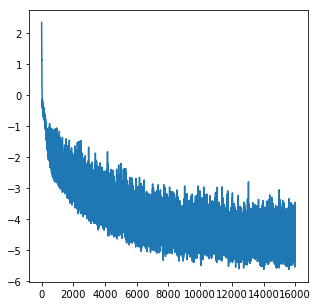

KeyboardInterrupt: 

In [46]:
plt.rcParams['figure.figsize'] = (5,5)
while True:
    global_step += 1
    
    s,a = get_batch(batch_size)
    y = variable(np.sum(-a**2, -1) + np.cos(10*s).squeeze())
    s = variable(s)
    a = variable(a)
    pred = q(s,a).squeeze()
    
    optimizer.zero_grad()
    loss = t.mean((y-pred)**2)
    
    loss.backward()
    optimizer.step()
    q.proj()
    
    losses.append(loss.data.numpy()[0])
    
    if global_step % 1000 == 0:
        clear_output(wait=True)
        plt.plot(np.log(losses))
        plt.show()

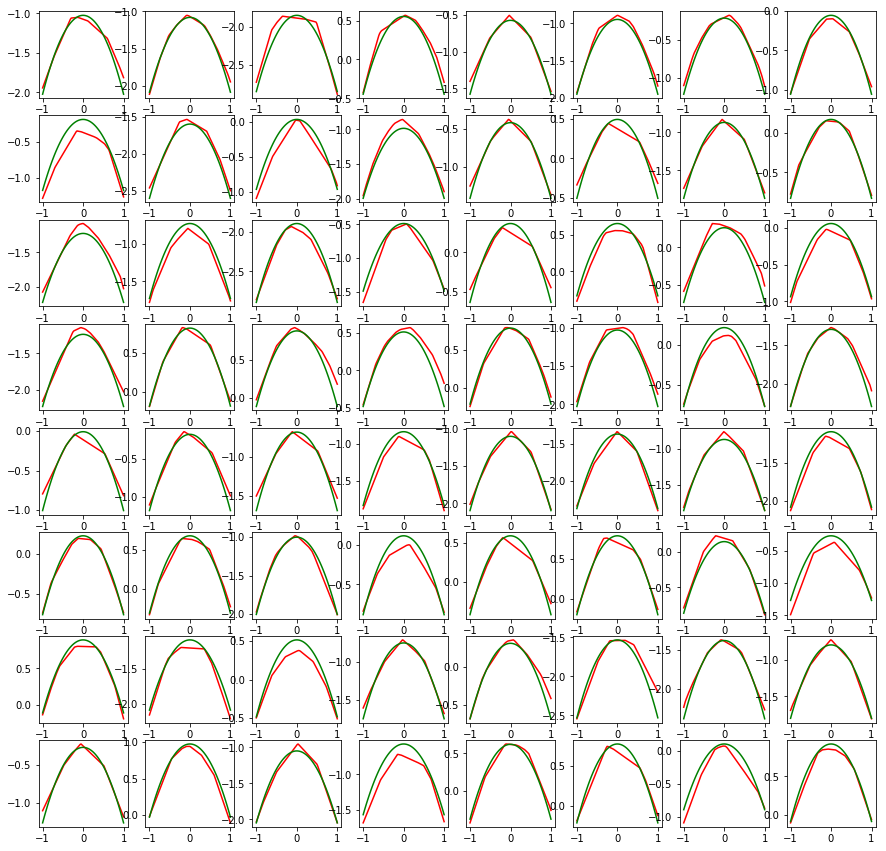

In [49]:
plt.rcParams['figure.figsize'] = (15,15)
n = 8
fig, axes = plt.subplots(n,n)
q.eval()
for i in range(n):
    for j in range(n):
        a1 = np.linspace(-1,1,100)
        a2 = npr.uniform(-1,1,1)
        s = np.concatenate(100*[npr.uniform(-1,1,(1,1))])
        y = -a1**2 - a2**2 + np.cos(10*s.squeeze())
        axes[i,j].plot(a, q(variable(s), variable(np.array([[aa, a2] for aa in a1]))).data.numpy().squeeze(), c='red')
        axes[i,j].plot(a, y, c='green')
plt.show()